**Running time and Complexity**

Today we'll be taking first steps to both understanding and formally reasoning about the time our programs take to run.
We will:
1. Trace the computation of code
2. Plot the running time of code
3. Introduce big-O notation

At the end of this series of lectures and labs, I would like you to be able to:
1. Look at a plot of code running time and say what the likely big-O complexity is
2. Predict a plot from a piece of code
3. Determine the big-O complexity of a piece of code
4. Given the big-O complexities of several pieces of code, know how to combine them if the code is combined

We will then use this knowledge to analyse sorting algorithms


Let's look at a few simple functions:

In [ ]:
def findSum(myList):
    sum = 0
    for element in myList:
        sum = sum + element
    return sum

def findSumOdd(myList):
    sum = 0
    for element in myList:
        if element % 2 != 0:
          sum = sum + element
    return sum

def findSumAfter(myList):
    newList = []
    for i in range(len(myList)):
            thisSum = 0
            for j in range(i, len(myList)):
                thisSum = thisSum + myList[j]
            newList.append(thisSum)
    return newList

Let's trace *in enormous detail* how many operations the interpreter does when we call this with (I'll do this on paper in lecture):

In [ ]:
findSum([1, 2, 3])
findSumOdd([1, 2, 3])
print(findSumAfter([1, 2, 3]))

[6, 5, 3]


Carefully counting the operations our code needs is one way we can look at how long our code will take to run.  We could do this, but it's likely to be a lot of work.  We will move toward a less-precise version of this in the form of big-O notation.  What we're really interested in is how the time it takes to run our code as the input gets bigger.  

In [ ]:
import time

inputLists = []
for i in range(100, 1000, 10):
    inputLists.append([1]*i)

for test in inputLists:
    t = time.process_time()
    findSum(test)
    elapsed_time = time.time() - t
    print(str(len(test)) + "  " + str(elapsed_time))






100  1674818138.6734276
110  1674818138.6733303
120  1674818138.6733294
130  1674818138.6733308
140  1674818138.6733491
150  1674818138.673831
160  1674818138.6738508
170  1674818138.673856
180  1674818138.6738734
190  1674818138.6738644
200  1674818138.673873
210  1674818138.6738746
220  1674818138.6741672
230  1674818138.6741831
240  1674818138.6746173
250  1674818138.67465
260  1674818138.6746411
270  1674818138.6746566
280  1674818138.674647
290  1674818138.6746485
300  1674818138.6746724
310  1674818138.6746604
320  1674818138.6746612
330  1674818138.674665
340  1674818138.6746888
350  1674818138.6746767
360  1674818138.674678
370  1674818138.6746855
380  1674818138.6746821
390  1674818138.6746838
400  1674818138.674685
410  1674818138.6747158
420  1674818138.6747003
430  1674818138.6746986
440  1674818138.6746943
450  1674818138.674695
460  1674818138.6746964
470  1674818138.6746986
480  1674818138.6747026
490  1674818138.674702
500  1674818138.6747205
510  1674818138.674708
520 

plotting in progress - fundSum


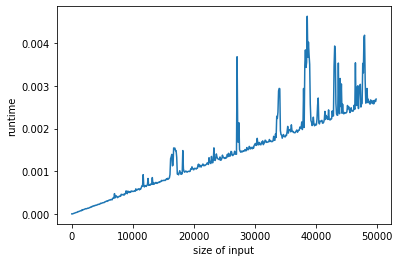

plotting complete


In [ ]:


import matplotlib.pyplot as plt
import time

def plotRuntimes(func, listOfInputs):
    plt.clf()
    times = []
    sizes = []
    for inputItem in listOfInputs:
        sizes.append(len(inputItem))
        t = time.process_time()
        func(inputItem)
        elapsed_time = time.process_time() - t
        times.append(elapsed_time)
    plt.plot(sizes, times)
    plt.xlabel('size of input')
    plt.ylabel('runtime')
    plt.show()

inputLists = []

def iterative_binary_search(my_list):
    value = 50
    lo =  0
    hi = len(my_list)-1
    while lo <= hi:
        mid = (lo + hi) // 2
        if my_list[mid] < value:
            lo = mid + 1
        elif value < my_list[mid]:
            hi = mid - 1
        else:
            return mid
    return -1

for i in range(10, 50000, 100):
    inputLists.append([1]*i)

print('plotting in progress - fundSum')
# plotRuntimes(iterative_binary_search, inputLists)
plotRuntimes(findSum, inputLists)
print('plotting complete')



plotting in progress - findSumAfter


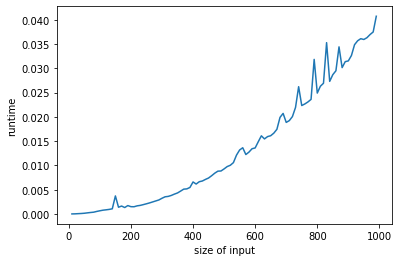

plotting complete


In [ ]:
inputLists = []
for i in range(10, 1000, 10):
     inputLists.append([1]*i)
# print(inputLists)

print('plotting in progress - findSumAfter')
# plotRuntimes(iterative_binary_search, inputLists)
plotRuntimes(findSumAfter, inputLists)
print('plotting complete')

plotting in progress - binary search


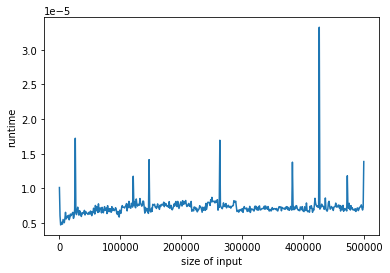

plotting complete


In [ ]:
inputLists = []
for i in range(10, 500000, 1000):
    inputLists.append([1]*i)

print('plotting in progress - binary search')
plotRuntimes(iterative_binary_search, inputLists)
print('plotting complete')

If we want to be more analytical, the idea of big-O notation can help us.  

What is big-O notation?

If f(n) is a function, and n is the size of the input to some code or algorithm, then we say that our code is O(f(n)) if, for a big enough n, the runtime of our code is upper-bounded by k*f(n)

Let's look at some of our examples. What are the big-O complexities of our functions from before?

<we will work through detail in lecture, I'll place answers below>


In [ ]:
def findSum(myList):
    sum = 0
    for element in myList:
        sum = sum + element
    return sum


def findSumOdd(myList):
    sum = 0
    for element in myList:
        if element % 2 != 0:
          sum = sum + element
    return sum

def findSumAfter(myList):
    newList = []
    for i in range(len(myList)):
            thisSum = 0
            for j in range(i, len(myList)):
                thisSum = thisSum + myList[j]
            newList.append(thisSum)
    return newList

To find the big-O complexities of our code, we need to argue about how long the code will take as the size of the input increases.  After our worked examples, we find that the above have:
- findSum is O(n)
- findSumOdd is O(n)
- findSumAfter is O(n<sup>2</sup>)

Can you think of a piece of code that would be O(1)?  How about O(n<sup>3</sup>)?



**Let's talk about how we combine the big-O running times of pieces of code.**

First: because we are talking about *very large inputs (asymptotics)*, we only care about the dominant term.
    
E.g.: if a<b, then O(n<sup>a</sup>) + O(n<sup>b</sup>) gives us O(n<sup>b</sup>)

eg:
- O(n<sup>2</sup>) + O(n) gives us O(n<sup>2</sup>)
- O(n<sup>4</sup>) + O(n<sup>5</sup>) gives us O(n<sup>5</sup>)

So! What about if we call our various functions in combination?

Do these as an exercise - what is the big-O complexity of each?
- findSum twice- O(n) + O(n) = ??
- findSum and then findSumOdd - O(n) + O(n) = ??
- findSumOdd and then findSumAfter - O(n) + O(n^2) = ??


## Time complexity and searching

Let's think about the big-O time complexity of the two searching algorithms we've talked about: simple search and binary search.  We know that binary search is faster, but how does this appear formally in big-O?

First let's talk about simple search.  What is the time complexity of the below?

In [ ]:
def simple_search(my_list, value):
  for i in range(len(my_list)):
    if my_list[i] == value:
      return i
  return None

Now let's trace binary search to try to get some big-O intuition:

In [ ]:
my_list = [-3, 0, 1, 19, 20, 22, 32]

def binary_search(my_list, lo, hi, value):
    if len(my_list) < 1:
        return -1
    if lo > hi:
        return -1
    mid = lo + hi // 2
    mid_value = my_list[mid]

    if mid_value == value:
        return mid
    elif mid_value < value:
        return binary_search(my_list, mid + 1, hi, value)
    else:
        return binary_search(my_list, lo, mid - 1, value)


my_list = [-3, 0, 1, 19, 20, 22, 32]
print(binary_search(my_list, 0, len(my_list) -1, 20))

**We still need to talk about the time complexity of binary search**

Think back to our tracing - how many times did we adjust our bounds?

What is the the worst-case for this search?  
- it is when the item is not in the list.

What will happen when we add one extra item?  What about when we double the size of the list?

How many times can we split our list in half before we're left with an empty list (or equal hi/lo bounds) to check?


**Example:** say we have a list of length 8.  How many loops?
1. Split 8 to 4
2. Split 4 to 2
3. Split 2 to 1
Item not found
**3 loops**

**Example:** say we have a list of length 64.  How many loops?
1. Split 64 to 32
2. Split 32 to 16
3. Split 16 to 8
4. Split 8 to 4
5. Split 4 to 2
6. Split 2 to 1
Item not found
**6 loops**

Note the pattern: 2^6 = 64, 2^3 = 8 - this gets a little more complicated for non-powers-of-two, but with work and details it can be worked out.

The time complexity of binary search is **O(log n)** which means that binary search is very efficient - for a list of length 1048576 we would expect less than 20 iterations!  and then doubling that to a list of length 2097152, we only expect 21.


So far, we have only talked about running time as the function of a length of a list, but it's mathematically fine to talk about it as a function of an input integer.  For example, say we have a functions that operate on numbers:

In [2]:
def my_function_1(n):
  return n+1

def my_function_2(n):
  sum = 0
  for i in range(n):
     sum = sum + i
  return sum



What about running time complexities that are larger than polynomial?  Can we have $O(2^n)$?  or $O(n!)$?

We certainly can!  These usually look like try-all possibilities pieces of code.  For example, think of a piece of code that generates all possible orderings of $n$ numbers.  Or, a piece of code that generates all possible sequences of Heads or Tails that we might obtain while playing a game of chance.  We have seen one of these in a session on recursion.
